In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel("ReviewTerbaru.xlsx", sheet_name="Curug Telu")

In [3]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [4]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

slangs={'yg':'yang', 'tdk':'tidak', 'pd':'pada', 'mlh':'malah',
        'jgn':'jangan', 'jg':'juga', 'tp':'tapi', 'blkg': 'belakang', 
        'dr':'dari', 'klo':'kalo', 'lg':'lagi'}

processed_comments = []

for sentence in data['Review']:
    # Remove all the special characters
    processed_comment = re.sub(r'\W', ' ', str(sentence))
    
    # Converting to Lowercase
    processed_comment = processed_comment.lower()
    
    #Remove number 
    processed_comment = re.sub(r'\d+', ' ', processed_comment)

    # remove all single characters
    processed_comment = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_comment)
    
    #remove duplicate character
    pattern=re.compile(r"(.)\1{1,}",re.DOTALL)
    processed_comment=pattern.sub(r"\1",processed_comment)

    #Corrected Slang words
    words = processed_comment.split()
    rfrm=[slangs[word] if word in slangs else word for word in words]
    processed_comment= " ".join(rfrm)

    #remove stopword
    factory = StopWordRemoverFactory()
    more_stopword = ['tak', 'jd', 'per', 'nya'] #menambahkan stopword
    stopwords = factory.get_stop_words() + more_stopword
    temp = [t for t in re.findall(r'\b[a-z]+-?[a-z]+\b',processed_comment) if t not in stopwords]
    processed_comment = ' '.join(temp)

    #stemming
    stemmer = StemmerFactory().create_stemmer()
    processed_comment = stemmer.stem(processed_comment)

    #Subtitusing multiple spaces with single space
    processed_comment = re.sub(r'\s+', ' ', processed_comment, flags=re.I)

    processed_comments.append(processed_comment)

In [5]:
processed_comments

['curug telu letak desa wisata karang salam kec baturaden kab banyumas jangkau mobil motor cari aja gole maps kok tempat indah turun penuh juang kata jaga tiket an anak tanga datar curam banyak curug panjang jalan curug bidadari kledung mau lompat lompat meter beberapa curug kecil kiri kanan tanga bawah wo curug telu jelas indah lihat curug besar lokasi curug kecil samping samping curug air jernih enak buat mandi bareng anak anak tiket masuk cukup rupiah plus parkir mobil motor juang balik awal cukup berat naik anak tanga curam tenang pegang kok panjang anak tanga kalau bawa anak anak pegangin licin so sobat mau main lasti ngak kecewa sekitar tempat curug banyak home stay camping ground curugtelu baturaden',
 'curugnya bagus banget curug satu tempat kelola baik bersih awat tiket masuk cuma rb murah banget licin tanga pas turunya pas bawah gak rugi kok bagus banget',
 'wisata alam indah alah ikan semua jaga lestari anak cucu',
 'tempat enak fasilitas sdh lengkap toilet tempat sampah tem

In [6]:
pip install XlsxWriter

Note: you may need to restart the kernel to use updated packages.


In [7]:
#SAVE HASIL PREPROCESSING
import xlsxwriter
workbook = xlsxwriter.Workbook('hasilpreprocessing.xlsx', {'nan_inf_to_errors': True})
worksheet=workbook.add_worksheet()
row=0
col=0
x=data
hasilakhir=list(zip(x.Nama,x.Waktu,x.Rating,x.Review,processed_comments))
worksheet.write(row, col, "Nama")
worksheet.write(row, col+1, "Waktu")
worksheet.write(row, col+2, "Rating")
worksheet.write(row, col+3, "Review")
worksheet.write(row, col+4, "CleanReview")
row+=1
for a,b,c,d,e in (hasilakhir):
    worksheet.write(row, col, a)
    worksheet.write(row, col+1, b)
    worksheet.write(row, col+2, c)
    worksheet.write(row, col+3, d)
    worksheet.write(row, col+4, e)
    row+=1
workbook.close()

In [8]:
#JIKA PREPROCESSING SUDAH ADA, MAKA PROSES DIAWALI DARI SINI
dataset = pd.read_excel('hasilpreprocessing.xlsx', sheet_name='Sheet1')
dataset['Number_of_words'] = dataset['CleanReview'].apply(lambda x:len(str(x).split()))
dataset.drop(dataset[dataset["Number_of_words"]<2].index, inplace = True)

In [9]:
#LOAD DICTIONARY
dictionary=pd.read_excel('NRC.xlsx', sheet_name='dict')
dictionary

,English (en),Indonesian (id),Javanese (jw),Malay (ms),Sundanese (su),Tagalog (Filipino) (tl),Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,kembali,aback,abak,aback,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,sempoa,abacus,abacus,abacus,abako,0,0,0,0,0,0,0,0,0,1
2,abandon,mengabaikan,nglirwaaken,abaikan,ninggalkeun,abandunahin,0,1,0,0,0,1,0,1,0,0
3,abandoned,ditinggalkan,ditinggal,ditinggalkan,ditinggalkeun,inabandunang,0,1,1,0,0,1,0,1,0,0
4,abandonment,ditinggalkan,abandonment,ditinggalkan,abandonment,pag-abanduna,0,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14188,zone,daerah,zona,Kawasan,wewengkon,zone,0,0,0,0,0,0,0,0,0,0
14189,zoo,kebun binatang,zoo,zoo,kebon sasatoan,zoo,0,0,0,0,0,0,0,0,0,0
14190,zoological,kehewanan,zoological,zoologi,Zoological,zoological,0,0,0,0,0,0,0,0,0,0
14191,zoology,ilmu hewan,zoologi,zoologi,elmu sasatoan,zoology,0,0,0,0,0,0,0,0,0,0


In [10]:
#Load NRC to memory
positive=[]
negative=[]
#teksbaru=''
for i in range(1,len(dictionary)):
    kata=dictionary.iloc[i,1]
    #print(kata)
    if (dictionary.iloc[i,6])==1:
        positive.append(kata)
    if (dictionary.iloc[i,7])==1:
        negative.append(kata)

In [11]:
processed_comments=dataset['CleanReview']
#print('Panjang :',len(processed_comments))
datasetangkapos=[]
for kalimat in processed_comments:
    baris=[]
    baris.append(kalimat)
    #ekstraksi fitur
    f_sentimenpositif=0
    f_sentimennegatif=0
    y=kalimat
    for teks in y.split():
        for j in range(0,len(positive)-1):
            if teks==positive[j]:
                f_sentimenpositif+=1
        for j in range(0,len(negative)-1):
            if teks==negative[j]:
                f_sentimennegatif+=1

    # l_sentimen=f_sentimenpositif-f_sentimennegatif
    l_sentimenne=0
    l_sentimenp=0
    l_sentimenn=0

    #menentukan label
    if f_sentimenpositif-f_sentimennegatif==0:
        l_sentimenne=0
    else:
        if f_sentimenpositif-f_sentimennegatif>0:
            l_sentimenp=1
        else:
            l_sentimenn=-1
    baris.append(l_sentimenp) #dataset(3)
    baris.append(l_sentimenn) #dataset(3)
    datasetangkapos.append(baris)

In [12]:
dataset_labelled=pd.DataFrame(datasetangkapos, columns=['Review','Positif','Negatif'])

In [13]:
dataset_labelled

,Review,Positif,Negatif
0,curug telu letak desa wisata karang salam kec ...,1,0
1,curugnya bagus banget curug satu tempat kelola...,1,0
2,wisata alam indah alah ikan semua jaga lestari...,1,0
3,tempat enak fasilitas sdh lengkap toilet tempa...,0,-1
4,tambah bagus sekarang udara sejuk air jernih c...,0,-1
...,...,...,...
291,kelola desa tata lila baik banyak tempat sampa...,0,-1
292,curug telu sangat anjur kunjung jangan lupa ab...,1,0
293,tempat adem sejuk bersih hutanya jaga saran ku...,0,-1
294,lumayan buat mandi,1,0


In [14]:
dataset_labelled['label'] = ''
dataset_labelled

,Review,Positif,Negatif,label
0,curug telu letak desa wisata karang salam kec ...,1,0,
1,curugnya bagus banget curug satu tempat kelola...,1,0,
2,wisata alam indah alah ikan semua jaga lestari...,1,0,
3,tempat enak fasilitas sdh lengkap toilet tempa...,0,-1,
4,tambah bagus sekarang udara sejuk air jernih c...,0,-1,
...,...,...,...,...
291,kelola desa tata lila baik banyak tempat sampa...,0,-1,
292,curug telu sangat anjur kunjung jangan lupa ab...,1,0,
293,tempat adem sejuk bersih hutanya jaga saran ku...,0,-1,
294,lumayan buat mandi,1,0,


In [15]:
dt = dataset_labelled
#pindahkan isi label positif dan negarif ke kolom label
for i in dt.index:
    if dt.at[i,'Positif']==1:
        dt.at[i,'label']=1
    if dt.at[i,'Negatif']==-1:
        dt.at[i,'label']=-1
    if ((dt.at[i,'Negatif']==0) and (dt.at[i,'Positif']==0)):
        dt.at[i,'label']=0

In [16]:
dt

,Review,Positif,Negatif,label
0,curug telu letak desa wisata karang salam kec ...,1,0,1
1,curugnya bagus banget curug satu tempat kelola...,1,0,1
2,wisata alam indah alah ikan semua jaga lestari...,1,0,1
3,tempat enak fasilitas sdh lengkap toilet tempa...,0,-1,-1
4,tambah bagus sekarang udara sejuk air jernih c...,0,-1,-1
...,...,...,...,...
291,kelola desa tata lila baik banyak tempat sampa...,0,-1,-1
292,curug telu sangat anjur kunjung jangan lupa ab...,1,0,1
293,tempat adem sejuk bersih hutanya jaga saran ku...,0,-1,-1
294,lumayan buat mandi,1,0,1


In [17]:
#Drop/ hapus kolom Positif dan Kolom Negatif
dt.drop(['Positif','Negatif'], axis=1, inplace=True)

In [18]:
dt.head(10)

,Review,label
0,curug telu letak desa wisata karang salam kec ...,1
1,curugnya bagus banget curug satu tempat kelola...,1
2,wisata alam indah alah ikan semua jaga lestari...,1
3,tempat enak fasilitas sdh lengkap toilet tempa...,-1
4,tambah bagus sekarang udara sejuk air jernih c...,-1
5,jalan curug lumayan terjal kalau punya asam ur...,0
6,jalan air terjun lumayan jauh cukup lelah wort...,-1
7,lumayan lelah jalan tuju curug telu tempat bag...,-1
8,spot wisata alam rekomended bgt nyaman bt nong...,-1
9,jalan tempat parkir tuju curug telu sangat lel...,0


In [19]:
#positif=dt.groupby['label'].sum()
positif=dt[dt['label'] ==1]['label'].count()
netral=dt[dt['label'] ==0]['label'].count()
negatif=dt[dt['label'] ==-1]['label'].count()
print('Label Sentimen Positif=',positif)
print('Label Sentimen Netral=',netral)
print('Label Sentimen Negatif=',negatif)
# print('Sentimen Negatif=',negatif)


Label Sentimen Positif= 200
Label Sentimen Netral= 45
Label Sentimen Negatif= 51


In [20]:
# Vektorisasi dengan TF-iDF
# Kali ini akan menggunakan library TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
objek_vektorizer= TfidfVectorizer() # Anda bisa juga menggunakan parameter max_feature
                                    # dengan menambahkan dalam kurung max_feature=3000,
                                    # artinya jika fitur yang dihasilkan lebih dari 3000
                                    # maka akan dipangkas dan hanya
                                    # 3000 fitur saja yang akan diproses.
                                    # hitung nilai-nilai bobot TF-IDF setiap fitur
vektor_dt=objek_vektorizer.fit_transform(dt['Review']).toarray()

In [21]:
print(vektor_dt)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
#cek jumlah fitur
jumlah_fitur=objek_vektorizer.get_feature_names()
print("Jumlah fitur kata yang dihasilkan dari proses vektorisasi :",len(jumlah_fitur))

Jumlah fitur kata yang dihasilkan dari proses vektorisasi : 1147


In [23]:
#buat objek baru objek_vektorizer_100
objek_vektorizer_100= TfidfVectorizer(max_features=100)
#proses vektorisasi
vektor_dt_100=objek_vektorizer_100.fit_transform(dt['Review']).toarray()
#mencari 100 fitur pertama
jumlah_fitur_100=objek_vektorizer_100.get_feature_names()
print("Jumlah 100 fitur kata yang dihasilkan dari proses vektorisasi :",len(jumlah_fitur_100))
print()
print()
#tampilkan 100 fitur kata pertama
print(jumlah_fitur_100)
#Tampiljkan bobot 100 fitur pertama
print("\n\n Ini 100 fitur kata:")
print(vektor_dt_100)

Jumlah 100 fitur kata yang dihasilkan dari proses vektorisasi : 100


['ada', 'adem', 'air', 'akses', 'alam', 'alami', 'anak', 'area', 'asri', 'bagus', 'baik', 'banget', 'banyak', 'baturaden', 'bawah', 'bayar', 'bersih', 'besar', 'bgt', 'bidadari', 'bikin', 'buat', 'butuh', 'cocok', 'cukup', 'cuma', 'curam', 'curug', 'curugnya', 'dapat', 'dingin', 'enak', 'foto', 'hati', 'hujan', 'indah', 'jadi', 'jaga', 'jala', 'jalan', 'jauh', 'jernih', 'kaki', 'kalau', 'kalo', 'kawasan', 'kedung', 'keluarga', 'keren', 'kesini', 'kunjung', 'lewat', 'lokasi', 'lumayan', 'main', 'makan', 'mandi', 'masuk', 'mau', 'mobil', 'motor', 'mudah', 'murah', 'naik', 'nikmat', 'nyaman', 'orang', 'pandang', 'parkir', 'pas', 'pokok', 'pulang', 'recomended', 'renang', 'sama', 'sampah', 'sana', 'sangat', 'satu', 'sedia', 'segar', 'seger', 'sejuk', 'sendang', 'siap', 'sini', 'spot', 'suasana', 'suka', 'tanga', 'tanganya', 'telu', 'tempat', 'terjun', 'tiket', 'tuju', 'turun', 'udara', 'warung', 'wisata']


 Ini 100 fitu

In [24]:
# Bagi data menjadi data training dan testing. Kita akan menggunakan hasil vektorisasi TFIDF ( semua fitur).
#Pada proses vektorisasi hasil TFIDF disimpan dalam vektor_dt
# panggil library untuk split data menjadi training dan testing
from sklearn.model_selection import train_test_split
y=dt['label']
y=y.astype('int')
Xtrain, Xtest,Ytrain, Ytest = train_test_split(vektor_dt, y, test_size=0.2, random_state=0)
vektor_dt

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<h1>Naive Bayes - Bernoulli </h1>

In [25]:
# Panggil kelas Naive Bayes
from sklearn.naive_bayes import BernoulliNB
#buat objek dari kelas Naive Bayes
model_NBM=BernoulliNB()

In [26]:
#lakukan training
model_NBM.fit(Xtrain,Ytrain)

BernoulliNB()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
y_preds = model_NBM.predict(Xtest)
print(" TABEL CONFUSSION MATRIX")
print("==========================")
print(confusion_matrix(Ytest,y_preds, labels=[1,0,-1]))
print("                    TABEL AKURASI")
print("====================================================")
print(classification_report(Ytest,y_preds))

 TABEL CONFUSSION MATRIX
[[38  1  2]
 [ 8  0  1]
 [ 8  0  2]]
                    TABEL AKURASI
              precision    recall  f1-score   support

          -1       0.40      0.20      0.27        10
           0       0.00      0.00      0.00         9
           1       0.70      0.93      0.80        41

    accuracy                           0.67        60
   macro avg       0.37      0.38      0.36        60
weighted avg       0.55      0.67      0.59        60



In [28]:
import seaborn as sns

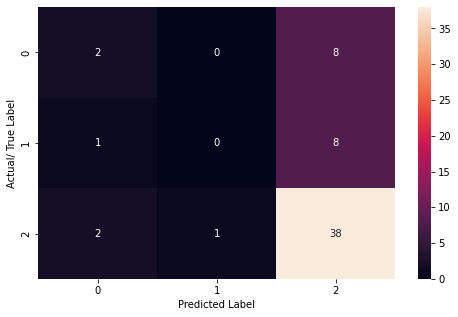

In [29]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(Ytest, y_preds), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual/ True Label")
plt.show()

In [30]:
print("\nNilai Setiap Parameter Cofussion Matrix")
print("====================================================")
print('Akurasinya adalah :',accuracy_score(Ytest, y_preds))
print('Presisi Model sebesar :',precision_score(Ytest, y_preds, average=None))
print('Kemamuan recall/ sensivitas Model sebesar:',recall_score(Ytest,y_preds, average=None) )
print('Specificity Model sebesar :',recall_score(Ytest,y_preds, pos_label=0, average=None))
print('Skor F-1 dari model sebesar:',f1_score(Ytest, y_preds, average=None))


Nilai Setiap Parameter Cofussion Matrix
Akurasinya adalah : 0.6666666666666666
Presisi Model sebesar : [0.4       0.        0.7037037]
Kemamuan recall/ sensivitas Model sebesar: [0.2        0.         0.92682927]
Specificity Model sebesar : [0.2        0.         0.92682927]
Skor F-1 dari model sebesar: [0.26666667 0.         0.8       ]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


<h1>SVM Linear</h1>

In [31]:
from sklearn.svm import LinearSVC

In [32]:
model_svm = LinearSVC()

In [33]:
model_svm.fit(Xtrain, Ytrain)

LinearSVC()

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_preds = model_svm.predict(Xtest)
print('                       Tabel Akurasi')
print('='*60)
print(classification_report(Ytest, y_preds))

                       Tabel Akurasi
              precision    recall  f1-score   support

          -1       0.50      0.30      0.37        10
           0       0.50      0.22      0.31         9
           1       0.76      0.93      0.84        41

    accuracy                           0.72        60
   macro avg       0.59      0.48      0.51        60
weighted avg       0.68      0.72      0.68        60



<h1> Decision Tree </h1>

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model_tree = DecisionTreeClassifier(criterion='gini')

In [37]:
model_tree.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_preds = model_tree.predict(Xtest)
print('                       Tabel Akurasi')
print('='*60)
print(classification_report(Ytest, y_preds))

                       Tabel Akurasi
              precision    recall  f1-score   support

          -1       0.80      0.40      0.53        10
           0       0.31      0.56      0.40         9
           1       0.85      0.80      0.83        41

    accuracy                           0.70        60
   macro avg       0.65      0.59      0.59        60
weighted avg       0.76      0.70      0.71        60

